In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read the dataset
df = pd.read_csv("weight-height.csv")

In [ ]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


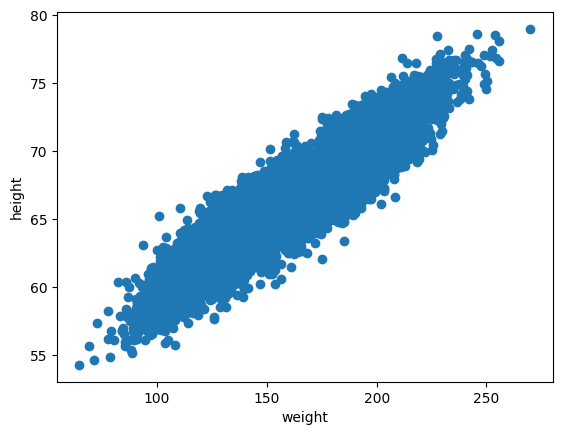

In [ ]:

plt.scatter(df['Weight'], df['Height'])  # Access columns using bracket notation with correct column names
plt.xlabel("weight")
plt.ylabel("height")
plt.show()

In [ ]:
#Problem statement >> I want to predict height based on weight

In [ ]:
#divide the data x and y
x = df[["Weight"]]
y = df[["Height"]]

In [ ]:
x

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
9995,136.777454
9996,170.867906
9997,128.475319
9998,163.852461


In [ ]:
y

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
9995,66.172652
9996,67.067155
9997,63.867992
9998,69.034243


In [ ]:
from re import X
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 1)

In [ ]:
x_train

,Weight
2694,160.063502
5140,111.619612
2568,184.436003
3671,182.241532
7427,86.059046
...,...
2895,205.545795
7813,152.749747
905,175.093255
5192,156.832191


In [ ]:
x_test

,Weight
9953,132.534229
3850,190.824938
4962,194.831396
3886,173.829606
5437,153.689739
...,...
3919,214.172512
162,198.581698
7903,135.027555
2242,183.852038


In [ ]:
y_train

,Height
2694,63.973557
5140,61.668566
2568,69.440754
3671,67.075193
7427,60.331972
...,...
2895,71.382577
7813,66.148829
905,66.539812
5192,66.563772


In [ ]:
y_test

,Height
9953,61.278349
3850,70.454991
4962,70.144763
3886,69.231469
5437,68.759636
...,...
3919,70.440162
162,72.489655
7903,63.437494
2242,69.030491


In [ ]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((8000, 1), (2000, 1), (8000, 1), (2000, 1))

In [ ]:
#scaling (optional) >> standardization >>fit_transform on train data and transform test data
# if you use fit data,(that is wrong)we are doing data leakage ,avoid it
#most of the ML model standardscaler is used as it deals with normal distibution

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

In [ ]:
x_train

,Weight
2694,160.063502
5140,111.619612
2568,184.436003
3671,182.241532
7427,86.059046
...,...
2895,205.545795
7813,152.749747
905,175.093255
5192,156.832191


In [ ]:
#scaling should be done always after train test spilt
#target variable should not be scaled
#avoid scaling categorical features
x_train = scaler.fit_transform(x_train) # for train data use fit_transform
x_test = scaler.transform(x_test)  # for data use transform

In [ ]:
x_train

array([[-0.04537512],
       [-1.56183285],
       [ 0.71756668],
       ...,
       [ 0.42510703],
       [-0.14652608],
       [ 1.15657305]])

In [ ]:
x_test

array([[-0.90713456],
       [ 0.91756198],
       [ 1.04297766],
       ...,
       [-0.82908501],
       [ 0.69928661],
       [ 1.80251581]])

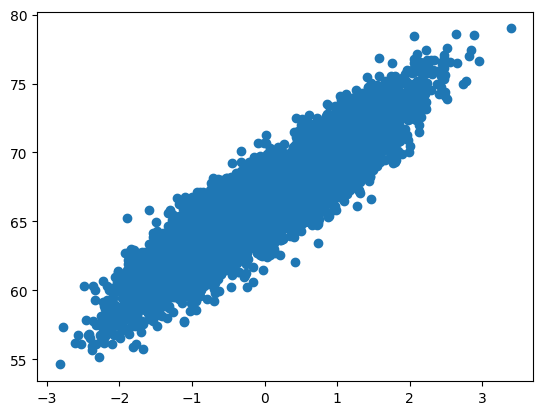

In [ ]:
#scaling is optinal >> why because it doesn't affect the distribution of data
plt.scatter(x_train,y_train)

In [ ]:
#model training
from sklearn.linear_model import LinearRegression

#linear regression parameters
#fit_intercept >> the best fit line have intercept , default it is true
#copy_x >> copy the original x_train and then build the model,it will not modify the original data
#n_jobs >> -1 means using all processors.
#positive >> when set to True , forces the coefficients to be positive.
#fill >> train the model
#predict >> test the model

#after building the model , we have attributes of the model
#corfficient
#intercept

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor

LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([[3.52331055]])

In [ ]:
regressor.intercept_

array([66.37946762])

In [ ]:
print("The slope or coef of model is ",regressor.coef_)
print("The intercept of model is ",regressor.intercept_)

The slope or coef of model is  [[3.52331055]]
The intercept of model is  [66.37946762]


In [ ]:
#prediction on train data
#interpretation of coef >> one unit increase in weight on an average the increase by 3.52331055 units
#precticted height(y) on xtrain = 66.37946762+3.52331055*(xtrain)
#precticted height(y) on xtest= 66.37946762+3.52331055*(xtest)



In [ ]:
#prediction on train
regressor.predict(x_train)

array([[66.21959699],
       [60.87664545],
       [68.90767787],
       ...,
       [67.87725171],
       [65.86321073],
       [70.45443364]])

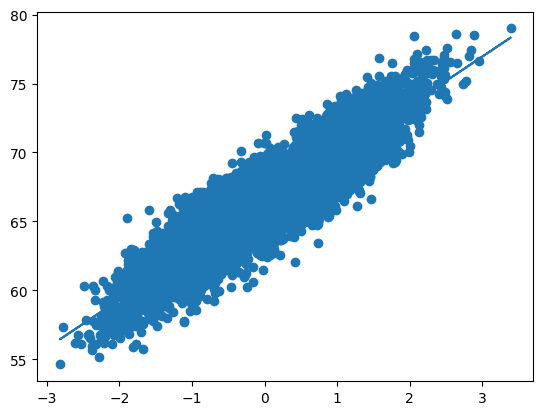

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train))

In [ ]:
y_pred_test = regressor.predict(x_test)

In [ ]:
y_pred_test

array([[63.18335087],
       [69.6123234 ],
       [70.05420182],
       ...,
       [63.45834365],
       [68.8432715 ],
       [72.73029057]])

In [ ]:
y_pred_test,y_test

(array([[63.18335087],
        [69.6123234 ],
        [70.05420182],
        ...,
        [63.45834365],
        [68.8432715 ],
        [72.73029057]]),
          Height
 9953  61.278349
 3850  70.454991
 4962  70.144763
 3886  69.231469
 5437  68.759636
 ...         ...
 3919  70.440162
 162   72.489655
 7903  63.437494
 2242  69.030491
 2745  72.665242
 
 [2000 rows x 1 columns])

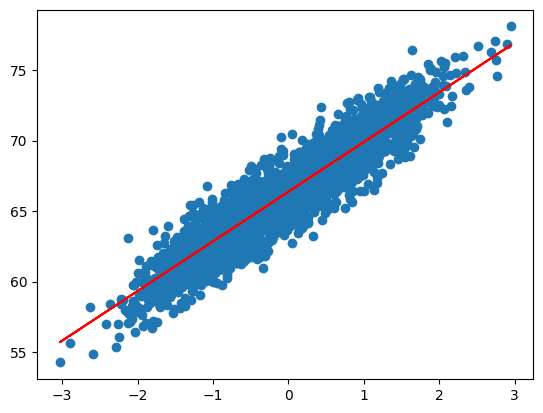

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),'r')

In [ ]:
#performance metrics

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred_test)

1.1590551083494864

In [ ]:
mean_squared_error(y_test,y_pred_test)

2.087511891725016

In [ ]:
r2_score(y_test,y_pred_test) #rsquare = 1-SSR/SST


0.8672044381371458

In [ ]:
#adjusted rsquare
#adjusted R2 = [1-(1-rsquare)*n-1/(n-k-1)] #n is no of observation and kis no of predictor variable

In [ ]:
x_test.shape[1]

1

In [ ]:
1-(1-rsq)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
#adjusted rsq will be lesser than r square

NameError: name 'rsq' is not defined

In [ ]:
#assumption
#x-y should have linear realtionship
#Obervation should have no realtion
#errorshould have constant variation
#error shoild be noramlly distributed
# features among them self should be least related

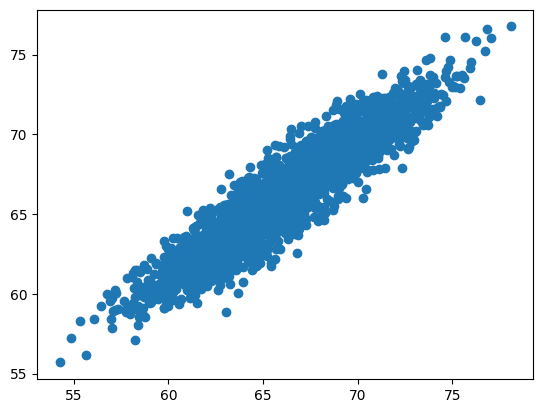

In [ ]:
plt.scatter(y_test,y_pred_test)
#to check if y_test and its prediction alines

In [ ]:
error = y_test - y_pred_test

In [ ]:
error

,Height
9953,-1.905001
3850,0.842668
4962,0.090561
3886,1.493587
5437,3.243011
...,...
3919,-1.747202
162,2.021827
7903,-0.020849
2242,0.187220


<ipython-input-79-3bd4b80a5a37>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: ylabel='Density'>

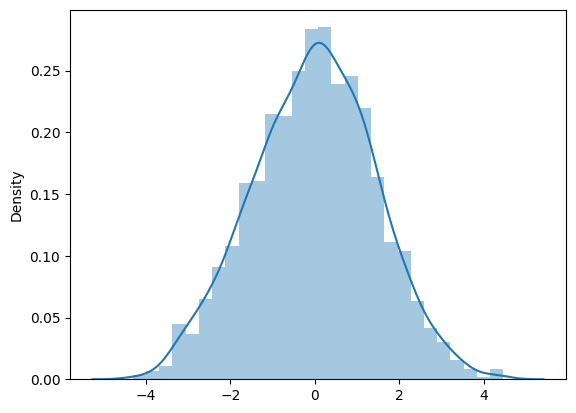

In [ ]:
import seaborn as sns
sns.distplot(error) #approximately a normal distribution

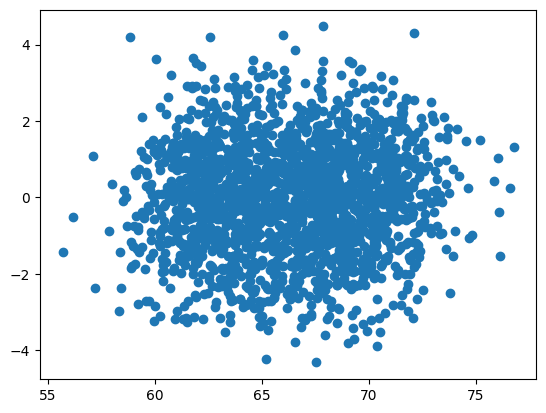

In [ ]:
#to check constatnt variance
plt.scatter(y_pred_test,error)